# CSC12110 – Phân tích dữ liệu ứng dụng
# ĐỒ ÁN THỰC HÀNH
## Nhóm 20CQ.PTDL.09:
- 20120257 - Đinh Hoàng Bảo Châu
- 20120295 - Ngô Võ Quang Huy
- 20120566 - Võ Ngọc Sơn
- 20120577 - Huỳnh Quốc Thái

## Quan sát và phân tích tập dữ liệu (EDA)
#### **1. Cho biết kiểu dữ liệu của các thuộc tính**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file Excel
data_train_p1 = pd.read_excel("Data_Train_p1.xlsx")
data_train_p2 = pd.read_excel("Data_Train_p2.xlsx")

# Kết hợp hai data set
merged_data = pd.concat([data_train_p1, data_train_p2])

# 1. Kiểu dữ liệu của các thuộc tính
print("1. Kiểu dữ liệu của các thuộc tính:")
print(merged_data.dtypes)

1. Kiểu dữ liệu của các thuộc tính:
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object


#### **2. Đối với cột Price, cho biết:**
- Giá cao nhất, thấp nhất, giá trung bình, mức giá xuất hiện nhiều
- Độ lệch chuẩn của cột price?
- Cho biết giá phân phối xung quanh trung tâm hay cách xa trung tâm? Nhận xét về giá trị mean và median của tập dữ liệu.
- Vẽ đồ thị histogram để nhận xét dữ liệu có bị lệch không?


2. Thống kê về cột Price:
   - Giá cao nhất: 79512
   - Giá thấp nhất: 1759
   - Giá trung bình: 9087.545582178958
   - Mức giá xuất hiện nhiều: 10262
   - Độ lệch chuẩn của cột Price: 4611.411872913706
   - Phân phối giá xung quanh trung tâm hay cách xa trung tâm?
     - Dữ liệu phân phối cách xa trung tâm.


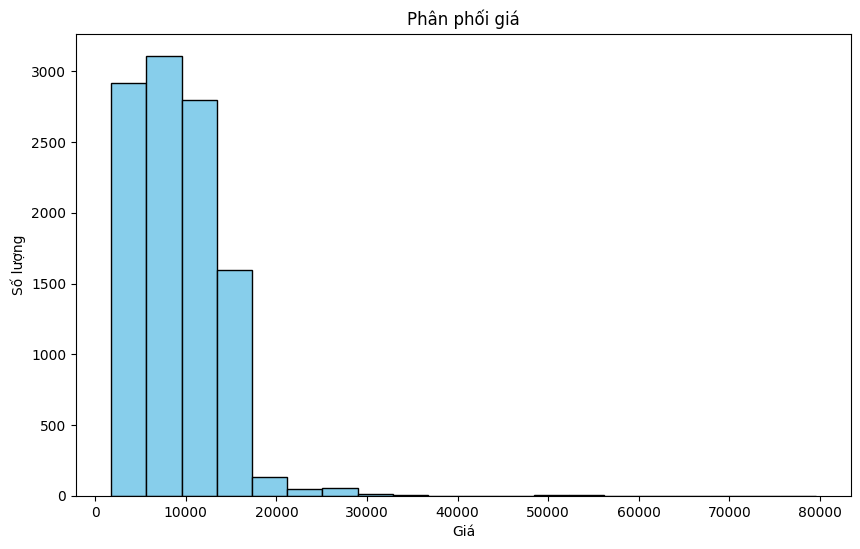

In [149]:
# 2. Thống kê về cột Price
print("\n2. Thống kê về cột Price:")
print("   - Giá cao nhất:", merged_data['Price'].max())
print("   - Giá thấp nhất:", merged_data['Price'].min())
print("   - Giá trung bình:", merged_data['Price'].mean())
print("   - Mức giá xuất hiện nhiều:", merged_data['Price'].mode()[0])
print("   - Độ lệch chuẩn của cột Price:", merged_data['Price'].std())
print("   - Phân phối giá xung quanh trung tâm hay cách xa trung tâm?")
if merged_data['Price'].mean() > merged_data['Price'].median():
    print("     - Dữ liệu phân phối cách xa trung tâm.")
else:
    print("     - Dữ liệu phân phối xung quanh trung tâm.")

# Vẽ đồ thị histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_data['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Phân phối giá')
plt.xlabel('Giá')
plt.ylabel('Số lượng')
plt.show()

#### 3. Mô tả số lượng missing value của mỗi thuộc tính

In [150]:
# 3. Mô tả số lượng missing value
print("\n3. Số lượng missing value của mỗi thuộc tính:")
print(merged_data.isnull().sum())


3. Số lượng missing value của mỗi thuộc tính:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


#### **4. Tính tỷ lệ % missing value của mỗi thuộc tính**

In [151]:
print("\n4. Tỷ lệ % missing value của mỗi thuộc tính:")
print((merged_data.isnull().sum() / len(merged_data)) * 100)


4. Tỷ lệ % missing value của mỗi thuộc tính:
Airline            0.00000
Date_of_Journey    0.00000
Source             0.00000
Destination        0.00000
Route              0.00936
Dep_Time           0.00000
Arrival_Time       0.00000
Duration           0.00000
Total_Stops        0.00936
Additional_Info    0.00000
Price              0.00000
dtype: float64


#### **5. Xử lý dữ liệu missing**

In [28]:
merged_data[merged_data['Route'].isnull()]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
7171,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [27]:
merged_data[merged_data['Total_Stops'].isnull()]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
7171,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


Sử dụng phương pháp loại bỏ khỏi dữ liệu dòng này, vì các lí do sau:
- Số dòng có giá trị NaN quá ít so với tập dữ liệu (chỉ có 1 dòng).
- Giá trị trung bình và trung vị không có biến đổi lớn nếu như thực hiện phương pháp dữ lại và thay thế bằng trung vị hoặc giá trị trung bình

In [145]:
merged_data = merged_data.dropna(how='any')

#### **6. Outlier: sử dụng đồ thị boxplot để quan sát cột Price có tồn tại outlier không?**

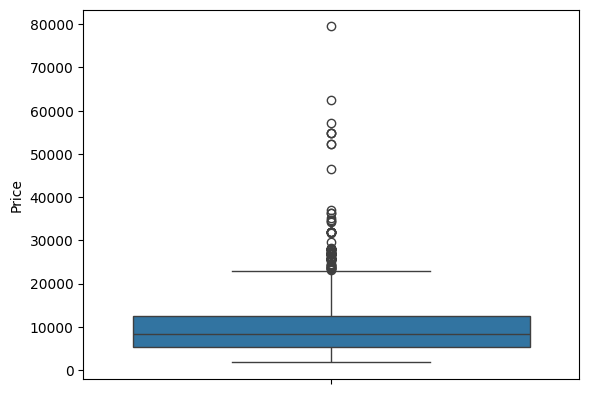

In [3]:
sns.boxplot(merged_data['Price'])
plt.show()

Sử dụng phương pháp IQR để phát hiện ngoại lai bởi vì:
- IQR là phương pháp ổn định khi đối mặt với dữ liệu có chênh lệch. Nó dựa vào phân vị thứ nhất (Q1) và phân vị thứ ba (Q3), nên không bị ảnh hưởng quá mức bởi giá trị cực lớn hoặc cực nhỏ. 
- IQR không yêu cầu phân phối chuẩn.

In [4]:
Q1 = merged_data['Price'].quantile(0.25)
Q3 = merged_data['Price'].quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = merged_data[(merged_data['Price'] < lower_bound) | (merged_data['Price'] > upper_bound)]

print("Before removing outliers:")
print('\tMedian: ', merged_data['Price'].median())
print('\tMean: ', merged_data['Price'].mean())
print('\tCount: ', merged_data['Price'].count())
print('\n')

print("After removing outliers:")
print('\tMedian: ', merged_data[~merged_data.index.isin(outliers.index)]['Price'].median())
print('\tMean: ', merged_data[~merged_data.index.isin(outliers.index)]['Price'].mean())
print('\tCount: ', merged_data[~merged_data.index.isin(outliers.index)]['Price'].count())

Before removing outliers:
	Median:  8372.0
	Mean:  9087.545582178958
	Count:  10684


After removing outliers:
	Median:  8346.5
	Mean:  8896.159874905232
	Count:  10552


#### **7. Chuẩn hóa dữ liệu**

In [152]:
merged_data["Date_of_Journey"]=pd.to_datetime(merged_data['Date_of_Journey'], dayfirst=True)
merged_data["Arrival_Time"]=merged_data['Arrival_Time'].str.split(' ').str[0]


merged_data["Airline"] = merged_data["Airline"].str.replace("Vistara Premium economy","Vistara")
merged_data["Airline"] = merged_data["Airline"].str.replace("Jet Airways Business","Jet Airways")
merged_data["Airline"] = merged_data["Airline"].str.replace("Multiple carriers Premium economy","Multiple carriers")

merged_data["Destination"] = merged_data["Destination"].replace("New Delhi","Delhi")

merged_data["Total_Stops"] = merged_data["Total_Stops"].map({"non-stop":0,"2 stops":2,"1 stop":1,"3 stops":3,"4 stops":4})

merged_data["month_of_Journey"] = merged_data["Date_of_Journey"].dt.month
merged_data["day_of_Journey"] = merged_data["Date_of_Journey"].dt.day
merged_data["year_of_Journey"] = merged_data["Date_of_Journey"].dt.year


In [106]:
merged_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month_of_Journey,day_of_Journey,year_of_Journey
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897,3,24,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,5,1,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882,6,9,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,5,12,2019
4,IndiGo,2019-03-01,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,Air India,2019-03-27,Delhi,Cochin,DEL → LKO → BOM → COK,07:00,19:15,12h 15m,2,No info,10913,3,27,2019
1865,IndiGo,2019-06-27,Chennai,Kolkata,MAA → CCU,22:05,00:25,2h 20m,0,No info,5277,6,27,2019
1866,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,10:20,21:00,10h 40m,1,No info,7485,5,21,2019
1867,Jet Airways,2019-03-24,Kolkata,Banglore,CCU → BOM → BLR,16:55,16:20,23h 25m,1,No info,14231,3,24,2019


## Visualize dữ liệu dạng bảng hoặc đồ thị: 
#### **1. Giá vé tăng khi nào?**

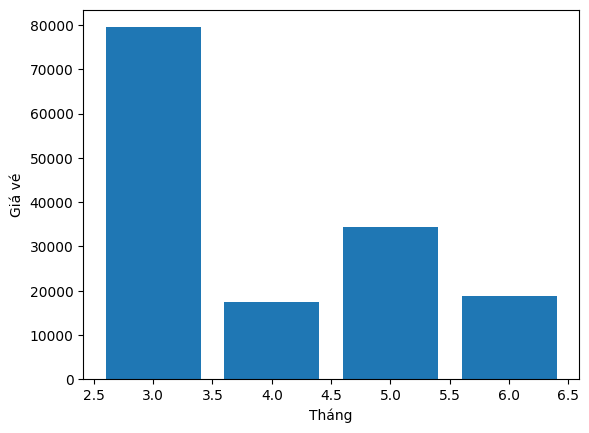

In [138]:
plt.bar(merged_data["Date_of_Journey"].dt.month, merged_data["Price"])
plt.xlabel('Tháng')
plt.ylabel('Giá vé')
plt.show()

Theo kết quả ta thấy, thì giá vé sẽ tăng trong khoảng từ tháng 4 - tháng 5

#### **2. So sánh tỷ lệ các chuyến bay thẳng và trung chuyển (có dừng)**

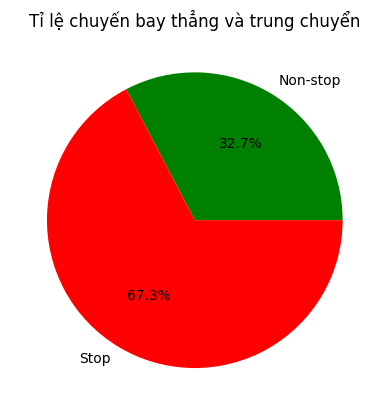

In [129]:
# Tổng số chuyến bay
n_rows = len(merged_data['Total_Stops'])

# Lấy số lượng chuyến bay thẳng
non_stop = (merged_data['Total_Stops'] == 0).sum()

# Số lượng chuyến bay trung chuyển
stop = n_rows - non_stop

# Tạo biểu đồ đường tròn
plt.pie([non_stop, stop], labels=['Non-stop', 'Stop'], colors=['green', 'red'], autopct='%1.1f%%')

# Thêm tiêu đề
plt.title('Tỉ lệ chuyến bay thẳng và trung chuyển')

# Hiển thị biểu đồ
plt.show()

Theo kết quả ta thấy, số lượng chuyến bay trung chuyển nhiều hơn gấp 2 lần so với các chuyến bay thẳng

#### **3. Thành phố nào có lượng chuyến bay đến/đi nhiều nhất?**
- Thành phố có số chuyến bay đi nhiều nhất

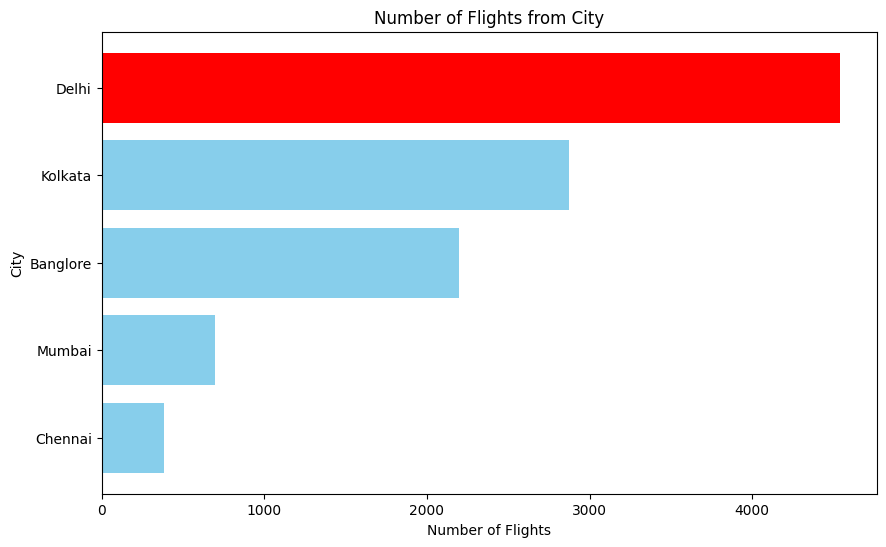

Thành phố có số chuyến bay đi nhiều nhất là Delhi


In [153]:
#Tính số chuyến bay theo nguồn và sắp xếp tăng dần
source_value_count = merged_data['Source'].value_counts().sort_values()
#Lấy index của nguồn có số chuyến bay nhiều nhất
n = len(source_value_count) - 1
#Vẽ barchart
plt.figure(figsize=(10, 6))
plt.barh(source_value_count.index, source_value_count, color='skyblue')
plt.barh(n, source_value_count.iloc[n], color='red')

plt.xlabel('Number of Flights')
plt.ylabel('City')
plt.title('Number of Flights from City')
plt.show()

print(f'Thành phố có số chuyến bay đi nhiều nhất là {source_value_count.index[n]}')

- Thành phố có số chuyến bay đến nhiều nhất

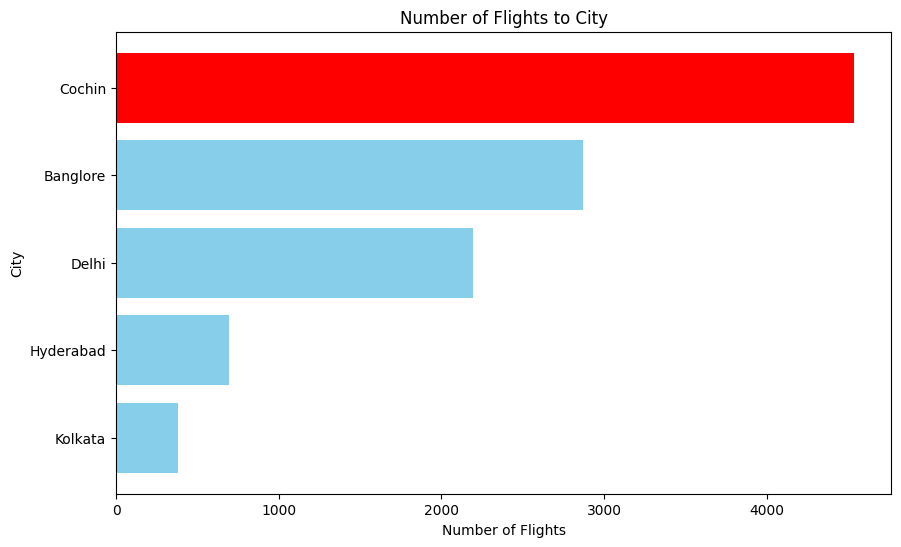

Thành phố có số chuyến bay đến nhiều nhất là Cochin


In [154]:
#Tính số chuyến bay theo đích và sắp xếp tăng dần
destination_value_count = merged_data['Destination'].value_counts().sort_values()

#Lấy index của nguồn có số chuyến bay nhiều nhất
n = len(destination_value_count) - 1

#Vẽ barchart
plt.figure(figsize=(10, 6))
plt.barh(destination_value_count.index, destination_value_count, color='skyblue')
plt.barh(n, destination_value_count.iloc[n], color='red')

plt.xlabel('Number of Flights')
plt.ylabel('City')
plt.title('Number of Flights to City')
plt.show()

print(f'Thành phố có số chuyến bay đến nhiều nhất là {destination_value_count.index[n]}')

#### **4. Hãng máy bay nào có số chuyến bay nhiều/thấp nhất?**

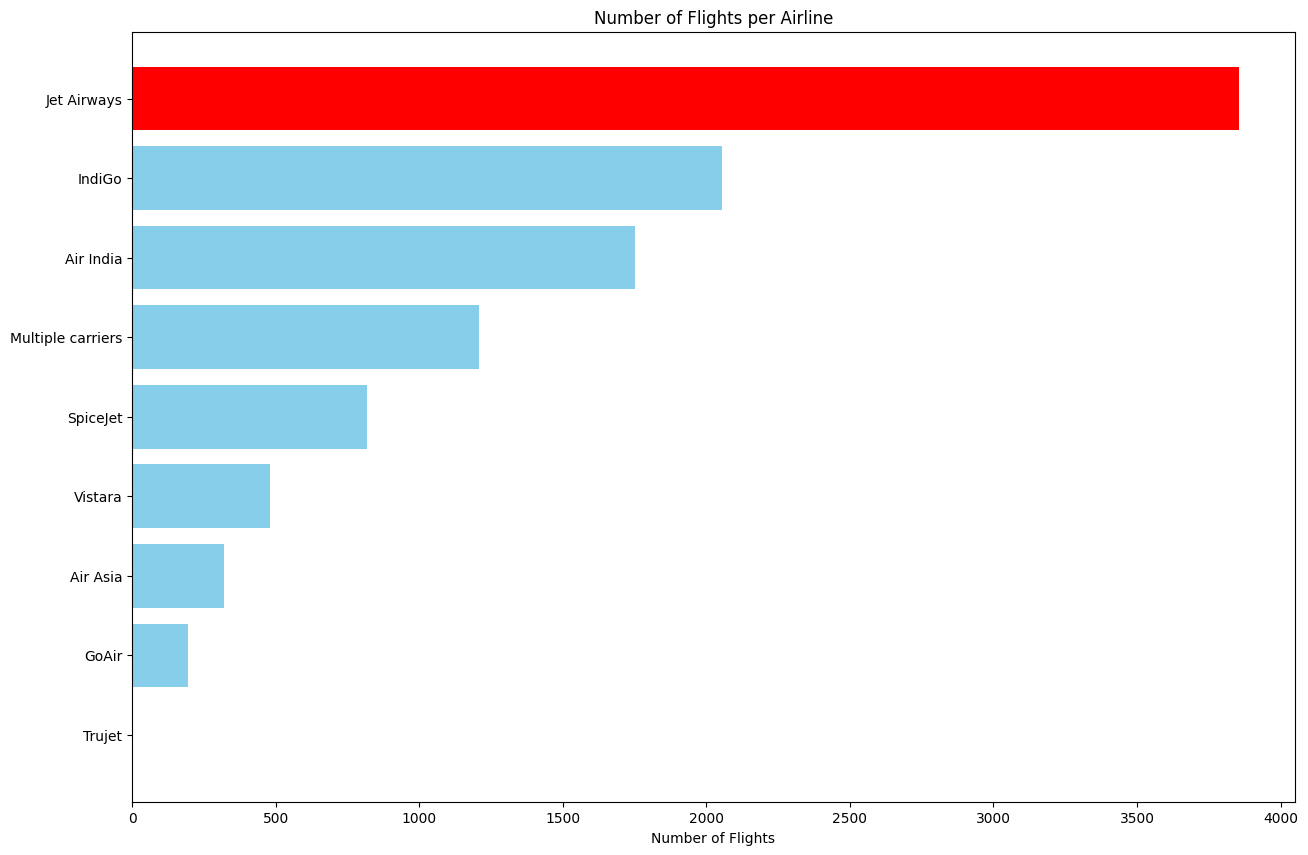

Hãng máy bay có số chuyến bay đến thấp nhất là Trujet
Hãng máy bay có số chuyến bay đến nhiều nhất là Jet Airways


In [155]:
#Tính số chuyến bay theo hãng máy bay và sắp xếp tăng dần
airline_value_count = merged_data['Airline'].value_counts().sort_values()
#Lấy index của nguồn có số chuyến bay nhiều nhất
n = len(airline_value_count) - 1

#Vẽ barchart
plt.figure(figsize=(15, 10))
plt.barh(airline_value_count.index, airline_value_count, color='skyblue')
plt.barh(0, airline_value_count.iloc[0], color='red')
plt.barh(n, airline_value_count.iloc[n], color='red')
plt.xlabel('Number of Flights')
# plt.ylabel('Airline')
plt.title('Number of Flights per Airline')
plt.show()

print(f'Hãng máy bay có số chuyến bay đến thấp nhất là {airline_value_count.index[0]}')
print(f'Hãng máy bay có số chuyến bay đến nhiều nhất là {airline_value_count.index[n]}')

#### **5. Tháng nào là tháng cao điểm**

In [156]:
flights_count_by_month = merged_data['month_of_Journey'].value_counts()
#Lấy index của nguồn có số chuyến bay nhiều nhất
n = flights_count_by_month.idxmax()
print(flights_count_by_month.index)
print(n)

Index([5, 6, 3, 4], dtype='int32', name='month_of_Journey')
5


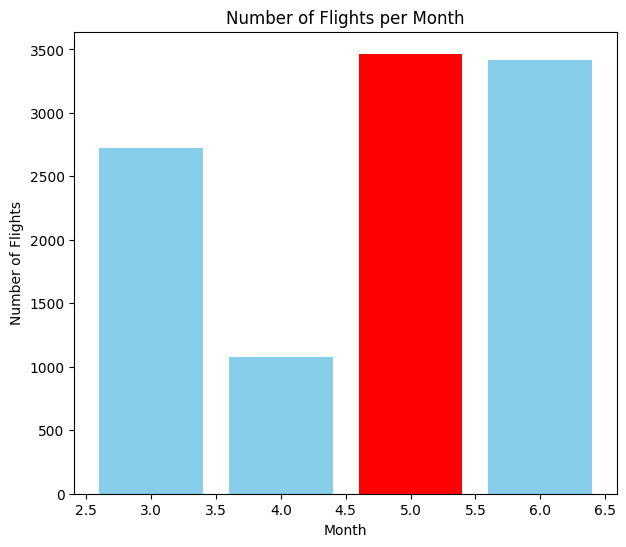

Tháng cao điểm là tháng 5


In [157]:
#Tính số chuyến bay theo tháng và sắp xếp tăng dần
flights_count_by_month = merged_data['month_of_Journey'].value_counts()
#Lấy index của nguồn có số chuyến bay nhiều nhất
n = flights_count_by_month.idxmax()

#Vẽ barchart
plt.figure(figsize=(7, 6))
plt.bar(flights_count_by_month.index, flights_count_by_month, color='skyblue')
plt.bar(n, flights_count_by_month[n], color='red')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Number of Flights per Month')
plt.show()


print(f'Tháng cao điểm là tháng {n}')

#### **6. Giá có thay đổi tùy theo hãng hàng không hay không?**

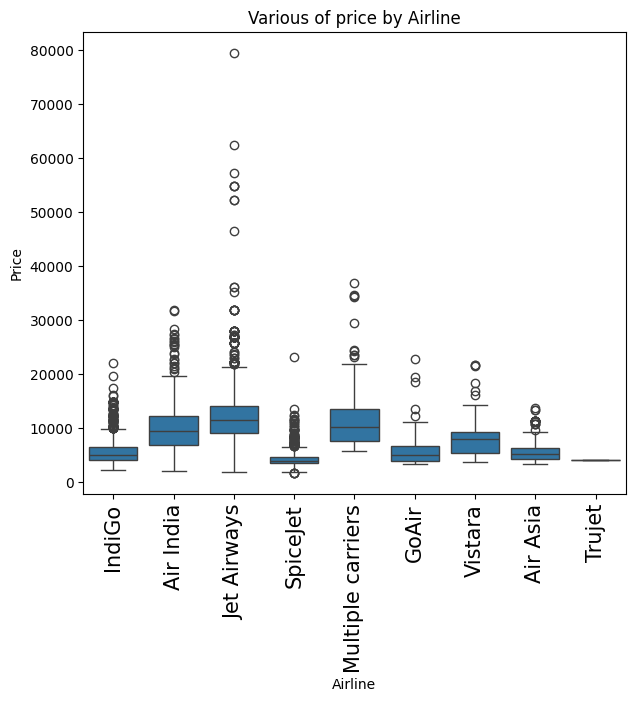

In [158]:
plt.figure(figsize=(7,6))
sns.boxplot(x="Airline",y="Price",data=merged_data)
plt.xticks(rotation=90,size=15)
plt.title("Various of price by Airline")
plt.show()

#### Giá thay đổi tùy theo hãng hàng không

#### **7. Giá vé bị ảnh hưởng như thế nào khi mua vé chỉ 1 hoặc 2 ngày trước ngày khởi hành?**

Câu này với tập dữ liệu hiện có, nó chưa đáp ứng được vì đây là tập dữ liệu về thông tin các chuyến bay nên không có các thuộc tính ngày mở bán hoặc ngày khách hàng mua.</br>
Vì vậy, nhóm sẽ phân tích giá vé chuyến bay cùng điểm đến và đi bị ảnh hưởng như thế nào nếu khác ngày khởi hành ('Date_of_Journey')

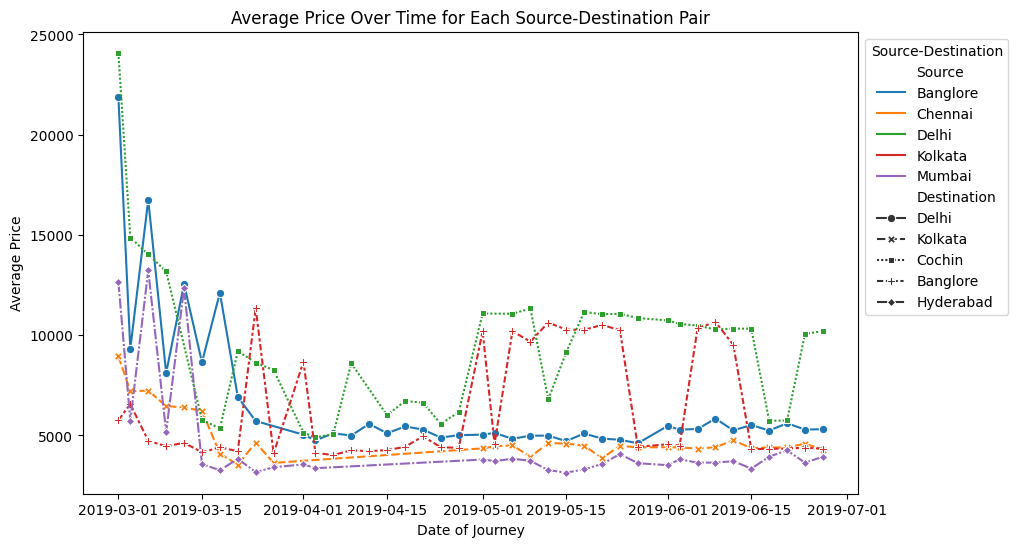

In [159]:

# Bởi vì trong 1 ngày có thể có nhiều chuyến bay cùng điểm đến và điểm đi nên sẽ tính giá trung bình
avgPriceEachDate = merged_data.groupby(["Date_of_Journey","Source","Destination"]).agg(avg_price=('Price', 'mean')).reset_index()


plt.figure(figsize=(10,6))
sns.lineplot(x='Date_of_Journey', y='avg_price', hue='Source', style='Destination', markers=True, data=avgPriceEachDate)
plt.title('Average Price Over Time for Each Source-Destination Pair')
plt.xlabel('Date of Journey')
plt.ylabel('Average Price')
plt.legend(title='Source-Destination', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Giá vé có thay đổi nếu khác ngày khởi hành:
- Hầu hết tất cả các chuyến bay vào đầu tháng 3, giá vé sẽ tăng cao nhất. Ngoại trừ chuyến bay từ Kolkata đi Banglore, giá vé tăng cao vào các thời điểm như: cuối tháng 3, tháng 5 và đầu tháng 6.
- Các chuyến bay Banglore đi Delhi, Mumbai đi Hyderabad và Chennai đi Kolkata sau khi tăng cao nhất vào đầu tháng 3, giá vé ở những tháng sau sẽ giảm xuống về mức trung bình.
- Giá vé chuyến bay Delhin đi Cochin và Kolkata đi Banglore biến động mạnh mẽ. Giá vé có sự thay đổi mạnh giữa các tháng khởi hành khác nhau.

#### 8. Giá vé có thay đổi theo thời gian đi và đến không?

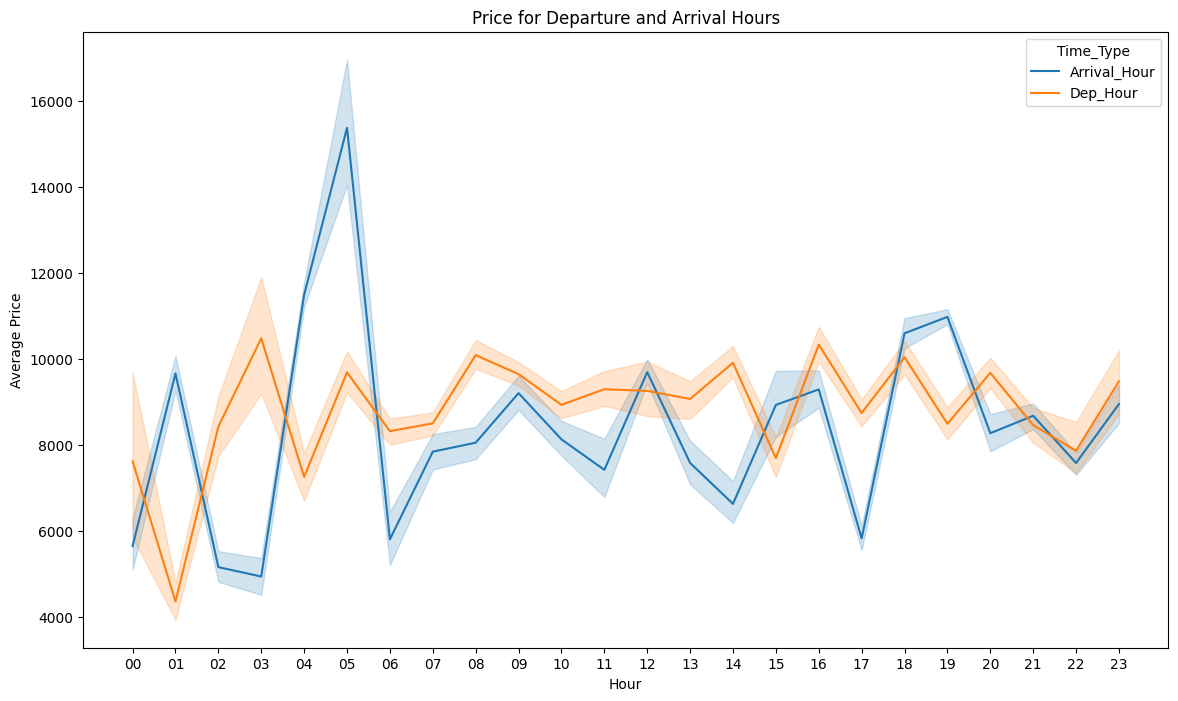

In [160]:
merged_data['Dep_Hour'] = merged_data['Dep_Time'].str.split(':').str[0]
merged_data['Arrival_Hour'] = merged_data['Arrival_Time'].str.split(':').str[0]

plot_data = pd.melt(merged_data[['Dep_Hour', 'Arrival_Hour', 'Price']],id_vars='Price', var_name='Time_Type', value_name='Hour')
plot_data = plot_data.sort_values("Hour")
# Visualize using a bar plot
plt.figure(figsize=(14, 8))
sns.lineplot(x='Hour', y='Price', hue='Time_Type', data=plot_data)
plt.title('Price for Departure and Arrival Hours')
plt.xlabel('Hour')
plt.ylabel('Average Price')
plt.show()

Giá vé có thay đổi theo thời gian đi và thời gian đến. Dựa vào biểu đồ phía trên, ta nhận thấy rằng:
- Thời gian đi vào lúc 1 giờ có giá vé khá là thấp, chỉ gần 4000 rupee, trong khi lúc 3 giờ thì giá vé là cao nhất với hơn 10000 rupee. 
- Còn đối với thời gian đến, thời gian đến vào lúc 5 giờ có giá vé cao nhất, gần 15000 rupee, trong khi vào lúc 3 giờ sáng là thấp nhất, khoảng 5000 rupee.

#### **9. Giá thay đổi như thế nào khi thay đổi Nguồn và Điểm đến?**

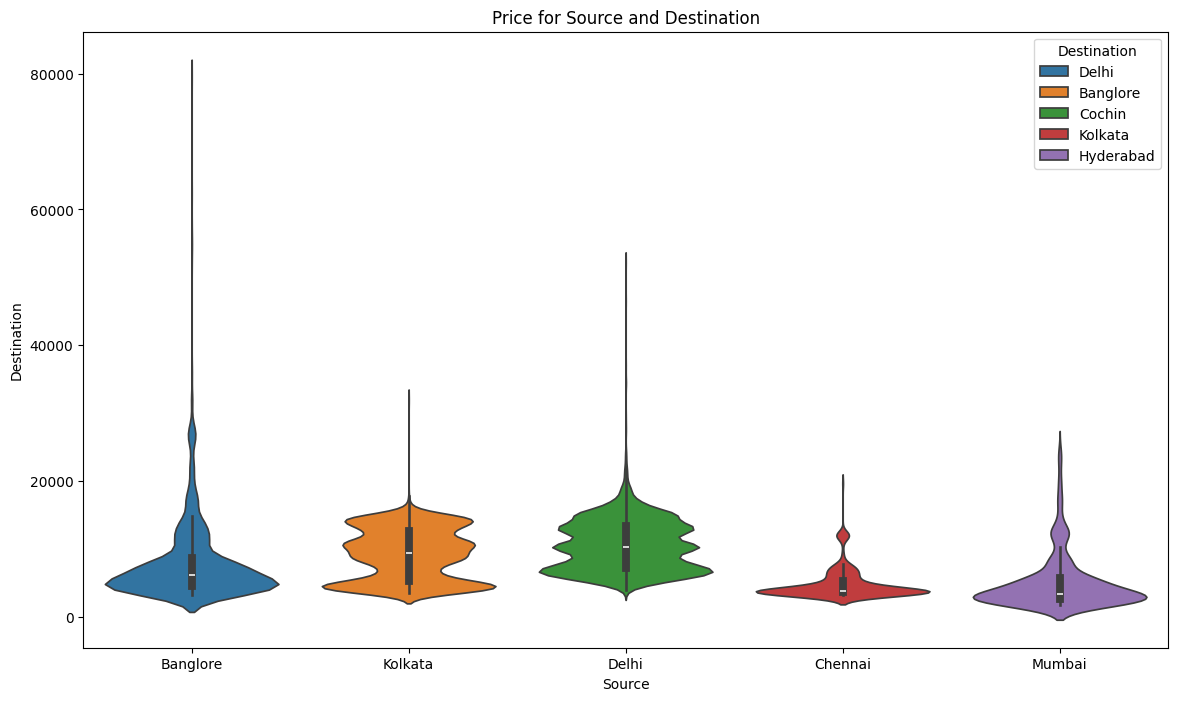

In [161]:
# Visualize using a bar plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='Source', y='Price', hue='Destination', data=merged_data)
plt.title('Price for Source and Destination')
plt.xlabel('Source')
plt.ylabel('Destination')
plt.show()

 Giá vé có thay đổi khi thay đổi điểm đi và điểm đến. 
 - Giá vé cao nhất là giá vé từ Banglore đi Delhi, giá vé thấp nhất là Mumbai đi Hyderabad. 
 - Các chuyến bay từ bốn thành phố ở Ấn Độ có sự chênh lệch đáng kể.

### **Kết luận các điểm chính quan sát được từ dữ liệu từ các gợi ý trên**
Thông qua các gợi ý trên, ta có thể rút ra các kết luận như sau:
- Thành phố Delhi có lượng chuyến bay đi nhiều nhất so với 4 thành phố khác của Ấn Độ, hơn 4 nghìn chuyến bay. Kolkata và Banglore lần lượt là hai thành phố có tổng số chuyến bay đi đứng nhì (hơn 2 nghìn chuyến) và ba (gần 3 nghìn chuyến). Bên cạnh đó, hai thành phố Mumbai và Chennai là hai thành phố có số lượng chuyến bay đi ít nhất, cả hai thành phố đều chưa đạt tới 1 nghìn chuyến bay đi. Qua đó, ta nhận thấy được sự chênh lệch rất lớn giữa thành phố Delhi với Mumbai và Chennai về số lượng chuyến bay đi.
- Thành phố Cochin là thành phố có lượng chuyến bay đến nhiều nhất Ấn Độ, hơn 4 nghìn chuyến bay đến. Qua đó, ta có thể thấy rằng Cochin có thể là một điểm đến phổ biến đối với dân trong nước và du khách nước ngoài. Tiếp theo, Banglore và Delhi lần lượt là hai thành phố có lượng chuyến bay đến nhiều thứ hai (gần 3 nghìn chuyến bay) và ba (hơn 2 nghìn chuyến bay) ở Ấn Độ. Cuối cùng, hai thành phố có số lượng chuyến bay đến ít nhất là thành phố Hyderabad và Kolkata, cả hai thành phố chưa đạt tới 1 nghìn chuyến bay.
- Hãng máy bay Jet Airways là hãng máy bay có số lượng chuyến bay nhiều nhất, với gần 4 nghìn chuyến bay, gần gấp đôi đối với hãng bay IndiGo - hãng máy bay có số lượng chuyến bay nhiều thứ hai, hơn 2 nghìn chuyến bay. Hãng máy bay Trujet là hãng máy bay có số lượng chuyến bay thấp nhất, chỉ với 1 chuyến bay được thục hiện.
- Tháng cao điểm nhất là tháng 5 với 3466 chuyến bay và tháng 6 với 3414 chuyến bay.
- Giá có thay đổi tuỳ theo hãng hàng không, tuy nhiên phần lớn giá vé sẽ tập trung trong khoảng 10000 rupee.
- Giá vé có thay đổi nếu khác ngày khởi hành, chẳng hạn như ở chuyến bay từ Banglore sang Delhi vào đầu tháng 3, giá vé tên lên trên 20000 rupee, tuy nhiên những tháng sau sẽ có dấu hiệu giảm và duy trì ở mức xoay quanh 5000 rupee.
- Giá vé có thay đổi theo thời gian đi và thời gian đến. Dựa vào biểu đồ phía trên, ta nhận thấy rằng thời gian đi vào lúc 1 giờ có giá vé khá là thấp, chỉ gần 4000 rupee, còn vào lúc 3 giờ thì giá vé là cao nhất với hơn 10000 rupee. Còn đối với thời gian đến, thời gian đến vào lúc 5 giờ có giá vé cao nhất, gần 15000 rupee, trong khi vào lúc 3 giờ sáng là thấp nhất, khoảng 5000 rupee.
- Giá vé có thay đổi khi thay đổi điểm đi và điểm đến. Giá vé cao nhất là giá vé từ Banglore đi Delhi, giá vé thấp nhất là Mumbai đi Hyderabad. Các chuyến bay từ bốn thành phố ở Ấn Độ có sự chênh lệch đáng kể.

### Ngoài các đặc trưng trong tập dữ liệu, các yếu tố nào có khả năng ảnh hưởng đến giá vé chuyến bay?

### Dự đoán giá vé